## We herein demonstrate single-cell cytological clustering of regions of interests (ROIs) within single cancer whole slide imaging (WSI). Data used here were originally all generated in QuPath (Petebank, 2017). For simplicity, sample data includes just several ROIs. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap

/home/yuunishi/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
print("pandas:",pd.__version__,"seaborn:",sns.__version__, "umap:",umap.__version__)

pandas: 2.2.2 seaborn: 0.13.2 umap: 0.5.6


In [10]:
df = pd.read_csv("Sample_data.tsv", sep="\t")

In [11]:
df

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Detection probability,Nucleus: Area µm^2,Nucleus: Length µm,...,Eosin: Membrane: Mean,Eosin: Membrane: Median,Eosin: Membrane: Min,Eosin: Membrane: Max,Eosin: Membrane: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,sample,PathCellObject,NaN,A,Polygon,42903.8,3319.5,0.6936,19.3080,17.2092,...,0.2271,0.2334,0.1309,0.2882,0.0392,0.2007,0.1943,0.1061,0.3027,0.0461
1,sample,PathCellObject,NaN,A,Polygon,42921.9,3321.5,0.8197,24.0603,23.4752,...,0.2357,0.2427,0.1444,0.3000,0.0335,0.2272,0.2360,0.0953,0.3408,0.0430
2,sample,PathCellObject,NaN,A,Polygon,42914.1,3322.8,0.5686,13.1488,13.2636,...,0.2584,0.2624,0.1805,0.3125,0.0250,0.2438,0.2468,0.1535,0.3125,0.0321
3,sample,PathCellObject,NaN,A,Polygon,42906.9,3324.8,0.7140,22.7849,17.2488,...,0.2491,0.2502,0.1604,0.2934,0.0254,0.2322,0.2325,0.1489,0.2940,0.0286
4,sample,PathCellObject,NaN,A,Polygon,42894.8,3326.6,0.8121,26.3264,19.1818,...,0.2426,0.2502,0.1083,0.2859,0.0350,0.2238,0.2408,0.0056,0.3112,0.0492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,sample,PathCellObject,NaN,D,Polygon,29222.2,22000.7,0.6806,15.9640,15.2149,...,0.1435,0.1533,-0.0959,0.2234,0.0664,0.1513,0.1545,-0.0959,0.2998,0.0541
26823,sample,PathCellObject,NaN,D,Polygon,29197.4,22000.7,0.5409,23.0560,20.4014,...,0.1669,0.1702,0.0505,0.2272,0.0386,0.1759,0.1822,0.0437,0.2468,0.0390
26824,sample,PathCellObject,NaN,D,Polygon,29342.7,22000.8,0.6806,19.6802,17.6502,...,0.1469,0.1438,-0.0036,0.2919,0.0541,0.1577,0.1575,-0.0602,0.2919,0.0591
26825,sample,PathCellObject,NaN,D,Polygon,29297.9,22001.4,0.5627,8.0815,11.9923,...,0.1391,0.1354,0.0386,0.2700,0.0518,0.1028,0.1027,-0.1972,0.2700,0.0645


In [12]:
df = df[["Parent", 'Nucleus: Area µm^2',
       'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Max diameter µm', 'Nucleus: Min diameter µm',
       'Hematoxylin: Nucleus: Mean',
       'Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 'Hematoxylin: Nucleus: Std.Dev.',
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cytoplasm: Median',
       'Hematoxylin: Cytoplasm: Min', 'Hematoxylin: Cytoplasm: Max',
       'Hematoxylin: Cytoplasm: Std.Dev.', 
       'Hematoxylin: Cell: Mean', 'Hematoxylin: Cell: Median',
       'Hematoxylin: Cell: Min', 'Hematoxylin: Cell: Max',
       'Hematoxylin: Cell: Std.Dev.', 'Eosin: Nucleus: Mean',
       'Eosin: Nucleus: Median', 'Eosin: Nucleus: Min', 'Eosin: Nucleus: Max',
       'Eosin: Nucleus: Std.Dev.', 'Eosin: Cytoplasm: Mean',
       'Eosin: Cytoplasm: Median', 'Eosin: Cytoplasm: Min',
       'Eosin: Cytoplasm: Max', 'Eosin: Cytoplasm: Std.Dev.',
        'Eosin: Cell: Mean', 'Eosin: Cell: Median',
       'Eosin: Cell: Min', 'Eosin: Cell: Max', 'Eosin: Cell: Std.Dev.']]
df = df.dropna()

In [13]:
df

,Parent,Nucleus: Area µm^2,Nucleus: Length µm,Nucleus: Circularity,Nucleus: Max diameter µm,Nucleus: Min diameter µm,Hematoxylin: Nucleus: Mean,Hematoxylin: Nucleus: Median,Hematoxylin: Nucleus: Min,Hematoxylin: Nucleus: Max,...,Eosin: Cytoplasm: Mean,Eosin: Cytoplasm: Median,Eosin: Cytoplasm: Min,Eosin: Cytoplasm: Max,Eosin: Cytoplasm: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,A,19.3080,17.2092,0.8193,6.3772,4.5940,0.3521,0.3531,0.1642,0.5719,...,0.2259,0.2281,0.1318,0.3027,0.0366,0.2007,0.1943,0.1061,0.3027,0.0461
1,A,24.0603,23.4752,0.5486,6.5583,5.0648,0.4439,0.4193,0.1287,0.7529,...,0.2468,0.2523,0.1491,0.3000,0.0272,0.2272,0.2360,0.0953,0.3408,0.0430
2,A,13.1488,13.2636,0.9392,4.6454,3.9441,0.2882,0.2870,0.0712,0.6140,...,0.2520,0.2566,0.1535,0.3125,0.0282,0.2438,0.2468,0.1535,0.3125,0.0321
3,A,22.7849,17.2488,0.9624,5.7718,5.2190,0.2628,0.2600,0.0856,0.4199,...,0.2459,0.2472,0.1604,0.2940,0.0223,0.2322,0.2325,0.1489,0.2940,0.0286
4,A,26.3264,19.1818,0.8991,7.1914,5.0367,0.4431,0.4243,0.0963,0.8281,...,0.2455,0.2515,0.1251,0.3112,0.0315,0.2238,0.2408,0.0056,0.3112,0.0492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,D,15.9640,15.2149,0.8666,5.5169,3.6465,0.6731,0.7298,0.0195,1.2631,...,0.1584,0.1627,-0.0506,0.2998,0.0526,0.1513,0.1545,-0.0959,0.2998,0.0541
26823,D,23.0560,20.4014,0.6961,8.7498,3.4507,0.4132,0.3913,0.1063,0.7406,...,0.1809,0.1845,0.0581,0.2468,0.0353,0.1759,0.1822,0.0437,0.2468,0.0390
26824,D,19.6802,17.6502,0.7939,7.1213,3.3730,0.4464,0.4025,0.0134,1.4215,...,0.1672,0.1763,0.0519,0.2919,0.0592,0.1577,0.1575,-0.0602,0.2919,0.0591
26825,D,8.0815,11.9923,0.7061,4.8010,2.1934,0.6944,0.6343,0.0025,1.4734,...,0.1105,0.1035,0.0386,0.2274,0.0310,0.1028,0.1027,-0.1972,0.2700,0.0645


## We can just compare various parameters before performing dimensional reduction and clustering.

In [14]:
feature = ['Nucleus: Area µm^2', 'Nucleus: Length µm',
       'Nucleus: Circularity', 'Nucleus: Max diameter µm','Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cell: Mean',
       'Hematoxylin: Cell: Median', 
       'Eosin: Nucleus: Mean',  'Eosin: Cell: Mean']

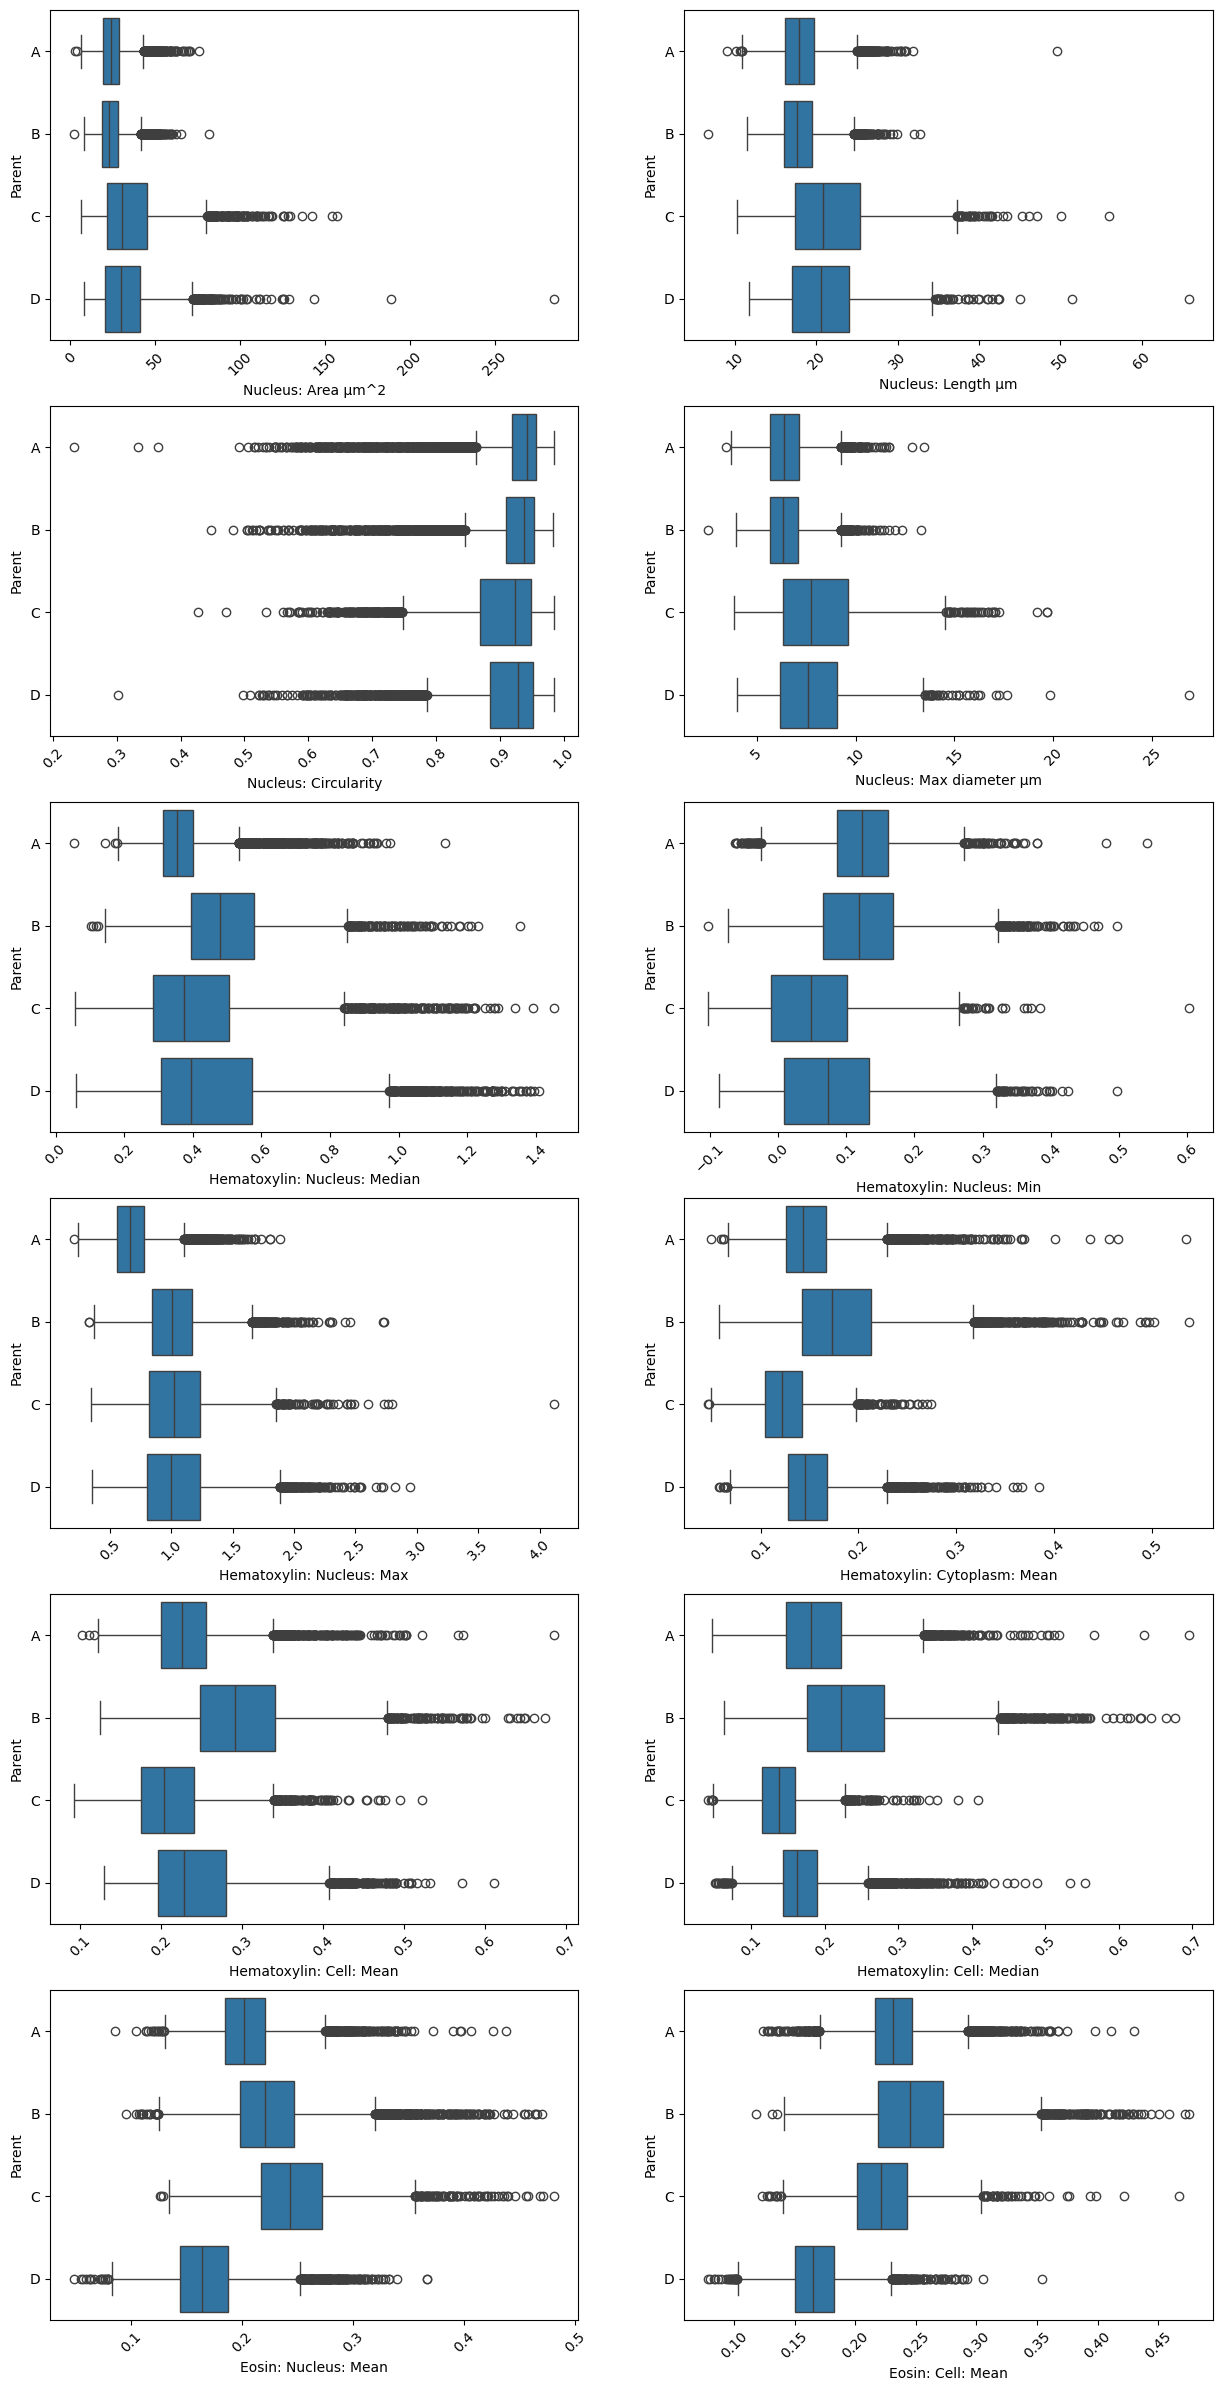

In [15]:
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 2, i[0]+1)
    sns.boxplot(x=i[1], y="Parent", data = df)
    plt.xticks(rotation = 45)

In [16]:
X = df.drop("Parent", axis=1)
Scaler = StandardScaler()
x_std = Scaler.fit_transform(X)

In [17]:
reducer = umap.UMAP()
mapper = reducer.fit(x_std)

In [18]:
embedding = mapper.embedding_
UMAPData = pd.DataFrame(embedding, columns=["x", "y"])
UMAPData["Name"] = df.Parent

In [19]:
UMAPData

,x,y,Name
0,0.904562,4.837368,A
1,2.539876,6.256523,A
2,-1.187100,5.727063,A
3,-0.955918,5.378537,A
4,2.188162,3.522232,A
...,...,...,...
26821,8.126286,8.562494,D
26822,6.617835,3.607969,D
26823,7.134280,3.828414,D
26824,10.133094,7.081190,D


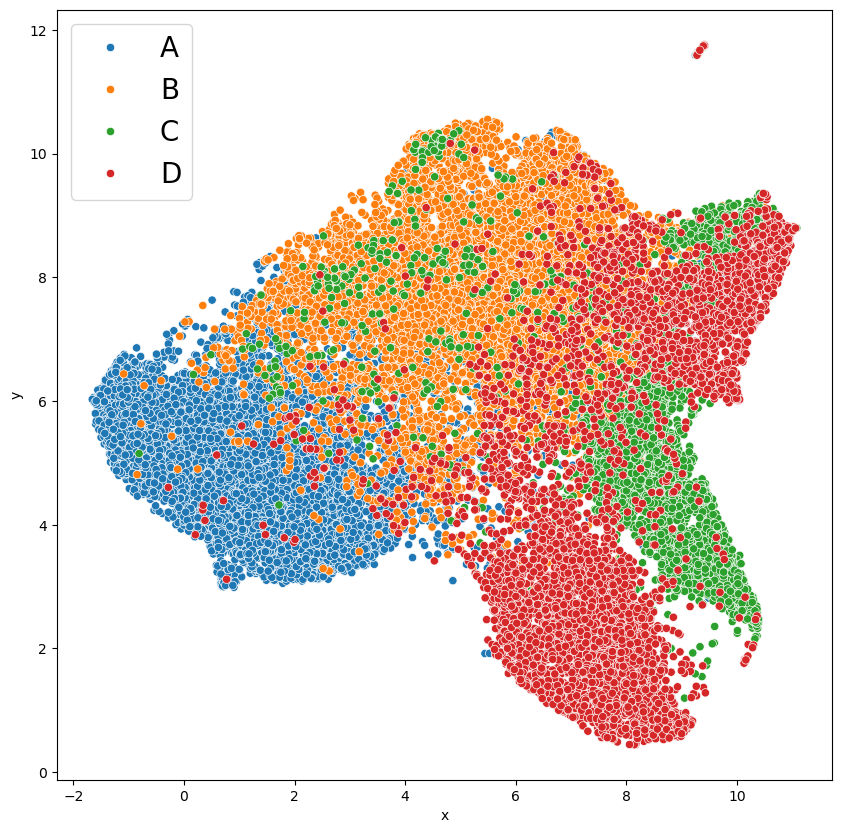

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData.Name)
plt.legend(fontsize = 20)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7133af992700>
Traceback (most recent call last):
  File "/home/yuunishi/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/yuunishi/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/yuunishi/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/yuunishi/miniconda3/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() err

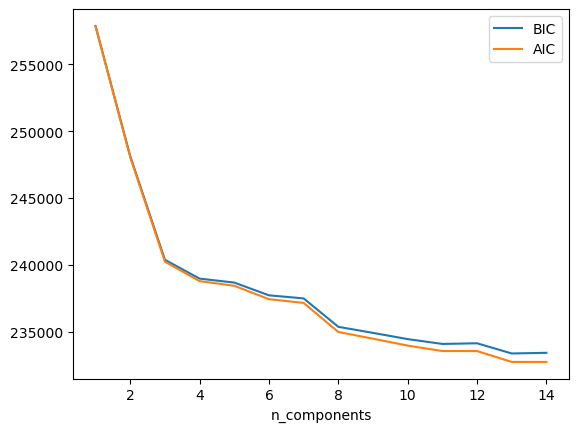

In [21]:
import numpy as np
from sklearn.mixture import GaussianMixture  as GMM
n_components = np.arange(1, 15)
models = [GMM(n_components=n, covariance_type='full', random_state=0, max_iter=500).fit(embedding)
          for n in n_components]

plt.plot(n_components, [m.bic(embedding) for m in models], label='BIC')
plt.plot(n_components, [m.aic(embedding) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [22]:
from sklearn.mixture import GaussianMixture as GMM    

model = GMM(n_components=8,
            covariance_type='full')
model.fit(embedding)                    
y_gmm = model.predict(embedding)        

In [23]:
y_gmm

array([5, 1, 5, ..., 0, 3, 3])

<Axes: xlabel='x', ylabel='y'>

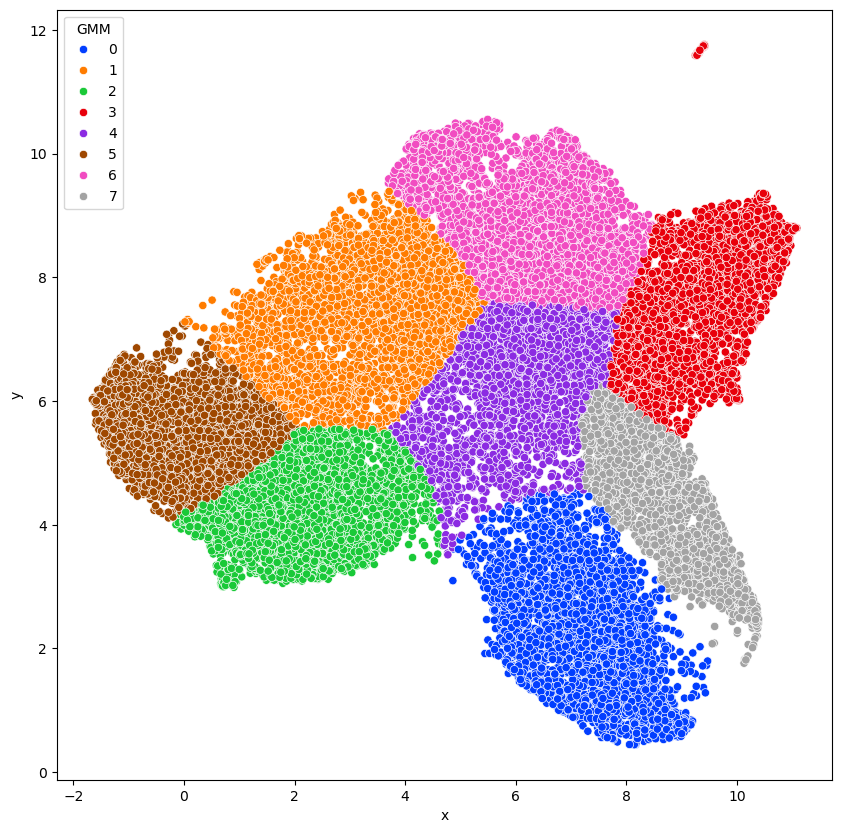

In [24]:
UMAPData["GMM"] = y_gmm
plt.figure(figsize=(10, 10))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData["GMM"], palette="bright")

## Cells are grouped into 8 clusters, and now we compare and cluster ROIs based on the proportion of cell clusters.

In [25]:
crosstb = pd.crosstab(UMAPData.Name, UMAPData.GMM, normalize="index")

In [26]:
crosstb

GMM,0,1,2,3,4,5,6,7
Name,,,,,,,,
A,0.008654,0.129469,0.423366,0.021977,0.049533,0.328627,0.033250,0.005124
B,0.008040,0.305766,0.012635,0.067425,0.205720,0.004020,0.379968,0.016425
C,0.034989,0.043454,0.002257,0.232506,0.033014,0.000847,0.031603,0.621332
D,0.594338,0.005006,0.009494,0.257725,0.071120,0.001381,0.036078,0.024858


[None, None, None, None]

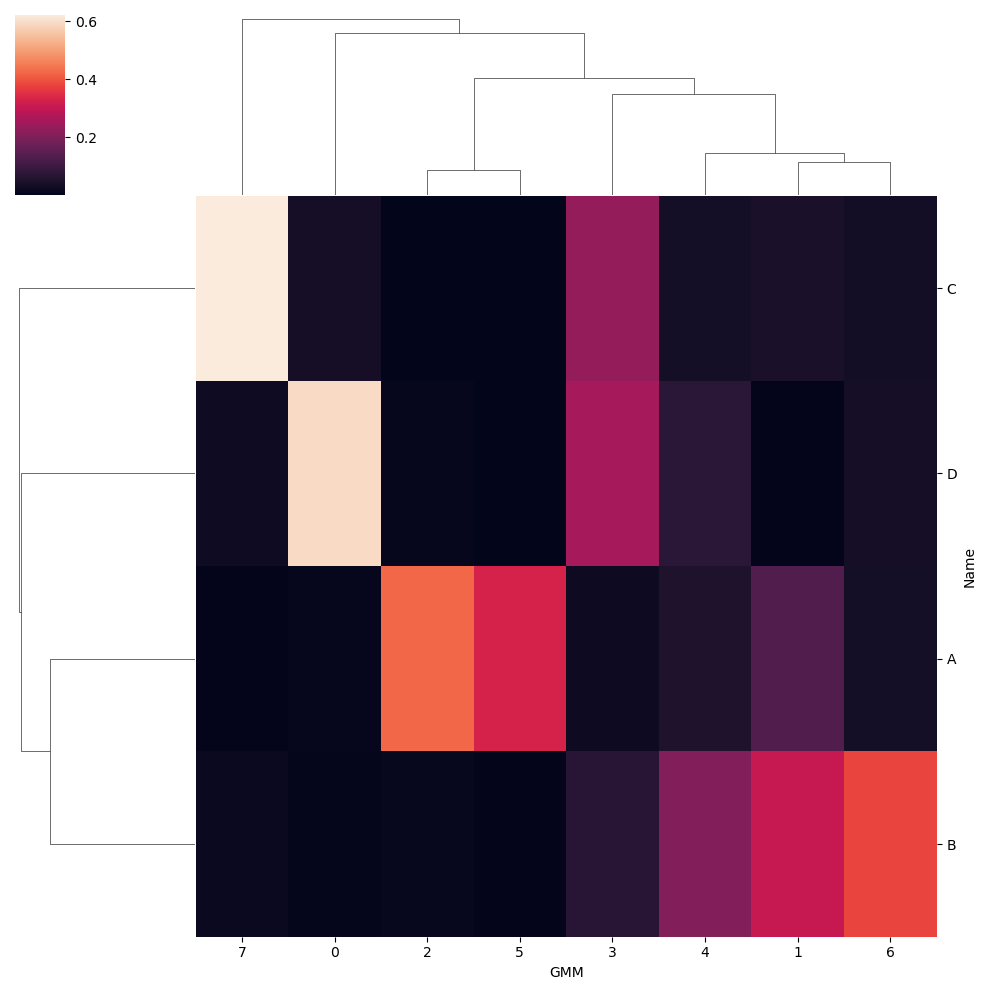

In [28]:
g = sns.clustermap(crosstb)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)